## Simulação de Caminhada Quântica: Distribuição de Probabilidade, Dispersão e Entropia de Entrelaçamento

Este notebook implementa uma simulação de uma caminhada quântica unidimensional. Exploraremos a evolução das amplitudes dos estados quânticos, a distribuição de probabilidade resultante, a dispersão da posição e a entropia de entrelaçamento ao longo dos passos da caminhada.

# Passo 1 - Importação das Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Passo 2 - Inicialização dos Estados

In [3]:
def initialize_states(steps, alpha, beta):
    """
    Inicializa as matrizes de amplitudes para os estados |a> e |b>.

    Parâmetros:
    - steps: Número total de passos na caminhada.
    - alpha: Parâmetro que influencia a amplitude inicial de |a>.
    - beta: Fase inicial aplicada ao estado |b>.

    Retorna:
    - a, b: Matrizes de amplitudes para os estados |a> e |b>.
    """
    # Inicializa as matrizes a e b com zeros (complexos) de tamanho (2*steps + 5) x (steps + 1)
    a = np.zeros((2 * steps + 5, steps + 1), dtype=complex)
    b = np.zeros((2 * steps + 5, steps + 1), dtype=complex)
    
    # Define as condições iniciais: amplitude no centro da linha (steps, 0)
    a[steps, 0] = np.cos(0.5 * alpha)  # Componente da amplitude |a> influenciada por alpha
    b[steps, 0] = np.exp(1j * beta) * np.sin(0.5 * alpha)  # Componente da amplitude |b> influenciada por beta
    return a, b


# Passo 3 - Atualização das Amplitudes

In [4]:
def update_amplitudes(a, b, q, theta, phi, steps):
    """
    Atualiza as amplitudes dos estados |a> e |b> para cada passo da caminhada quântica.

    Parâmetros:
    - a, b: Matrizes de amplitudes para os estados |a> e |b>.
    - q: Probabilidade associada à transição.
    - theta: Fase associada ao estado |a>.
    - phi: Fase associada ao estado |b>.
    - steps: Número total de passos na caminhada.

    Retorna:
    - DP: Distribuição de probabilidade na posição final.
    - sigma: Dispersão da posição ao longo dos passos.
    - SE: Entropia de entrelaçamento ao longo dos passos.
    """
    # Inicializa os vetores para armazenar a distribuição de probabilidade, dispersão e entrelaçamento
    DP = np.zeros(2 * steps + 5)
    sigma = np.zeros(steps + 1)
    SE = np.zeros(steps + 1)
    
    # Loop sobre os passos de tempo (t)
    for t in range(1, steps + 1):
        # Variáveis auxiliares para acumular valores
        A = 0  # Acumulador para calcular o termo A da entropia de entrelaçamento
        gamma = 0  # Acumulador para calcular o termo gamma da entropia de entrelaçamento
        jqm = 0  # Acumulador para calcular a dispersão (variância da posição)
        jm = 0  # Acumulador para calcular a média da posição
        
        # Loop sobre as posições possíveis no passo t (de -t até t)
        for j in range(-t, t + 1):
            j_idx = j + steps  # Índice ajustado para acessar as matrizes de amplitudes

            # Atualiza as amplitudes a e b baseando-se nos parâmetros q, theta e phi
            a[j_idx, t] = (np.sqrt(q) * a[j_idx - 1, t - 1] + 
                           np.sqrt(1 - q) * np.exp(1j * theta) * b[j_idx - 1, t - 1])
            b[j_idx, t] = (np.sqrt(1 - q) * np.exp(1j * phi) * a[j_idx + 1, t - 1] - 
                           np.sqrt(q) * np.exp(1j * (theta + phi)) * b[j_idx + 1, t - 1])

            # Acumula a probabilidade de estar no estado |a> em A
            A += np.abs(a[j_idx, t]) ** 2
            # Acumula o produto cruzado das amplitudes de |a> e |b> para calcular gamma
            gamma += a[j_idx, t] * np.conjugate(b[j_idx, t])
            
            # No último passo, armazena a probabilidade total na posição j
            if t == steps:
                DP[j_idx] = np.abs(a[j_idx, t]) ** 2 + np.abs(b[j_idx, t]) ** 2
            
            # Acumula valores para o cálculo da dispersão (sigma)
            jqm += j ** 2 * (np.abs(a[j_idx, t]) ** 2 + np.abs(b[j_idx, t]) ** 2)
            jm += j * (np.abs(a[j_idx, t]) ** 2 + np.abs(b[j_idx, t]) ** 2)
        
        # Calcula a dispersão sigma para o passo t
        sigma[t] = np.sqrt(jqm - jm ** 2)
        
        # Calcula a entropia de entrelaçamento (SE) para o passo t
        lambda_ = np.sqrt(0.25 - A * (1 - A) + gamma * np.conjugate(gamma))
        lambda_real = np.real(lambda_)  # Usa apenas a parte real de lambda
        SE[t] = -(0.5 + lambda_real) * np.log2(0.5 + lambda_real) - (0.5 - lambda_real) * np.log2(0.5 - lambda_real)

    return DP, sigma, SE


# Passo 4 - Plotagem dos Resultados

In [5]:
def plot_results(DP, sigma, SE, steps):
    """
    Gera gráficos para a distribuição de probabilidade, dispersão e entropia de entrelaçamento.

    Parâmetros:
    - DP: Distribuição de probabilidade na posição final.
    - sigma: Dispersão da posição ao longo dos passos.
    - SE: Entropia de entrelaçamento ao longo dos passos.
    - steps: Número total de passos na caminhada.
    """
    # Cria uma lista de tuplas para representar a posição e a probabilidade (Pxj)
    Pxj = [(j - steps, DP[j]) for j in range(2 * steps + 1)]
    # Cria listas para entropia de entrelaçamento (SE) e dispersão (sigma) ao longo dos passos
    SExt = [(t, SE[t]) for t in range(1, steps + 1)]
    sigmaxt = [(t, sigma[t]) for t in range(1, steps + 1)]

    # Plota a distribuição de probabilidade em função da posição j
    plt.figure(figsize=(10, 6))
    plt.plot(*zip(*Pxj), color='blue')
    plt.fill_between(*zip(*Pxj), color='blue', alpha=0.3)
    plt.title("Distribuição de Probabilidade na Posição Final")
    plt.xlabel("Posição j")
    plt.ylabel("Probabilidade")
    plt.grid(True)
    plt.show()

    # Plota a dispersão (sigma) em função do número de passos t
    plt.figure(figsize=(10, 6))
    plt.plot(*zip(*sigmaxt), color='green')
    plt.title("Dispersão da Posição ao Longo dos Passos")
    plt.xlabel("Passo t")
    plt.ylabel("Dispersão σ")
    plt.grid(True)
    plt.show()

    # Plota a entropia de entrelaçamento (SE) em função do número de passos t
    plt.figure(figsize=(10, 6))
    plt.plot(*zip(*SExt), color='red')
    plt.title("Entropia de Entrelaçamento ao Longo dos Passos")
    plt.xlabel("Passo t")
    plt.ylabel("Entropia de Entrelaçamento SE")
    plt.ylim([0, 1])  # Limita o eixo y de 0 a 1 para a entropia de entrelaçamento
    plt.grid(True)
    plt.show()


# Passo 5 - Execução Principal da Simulação

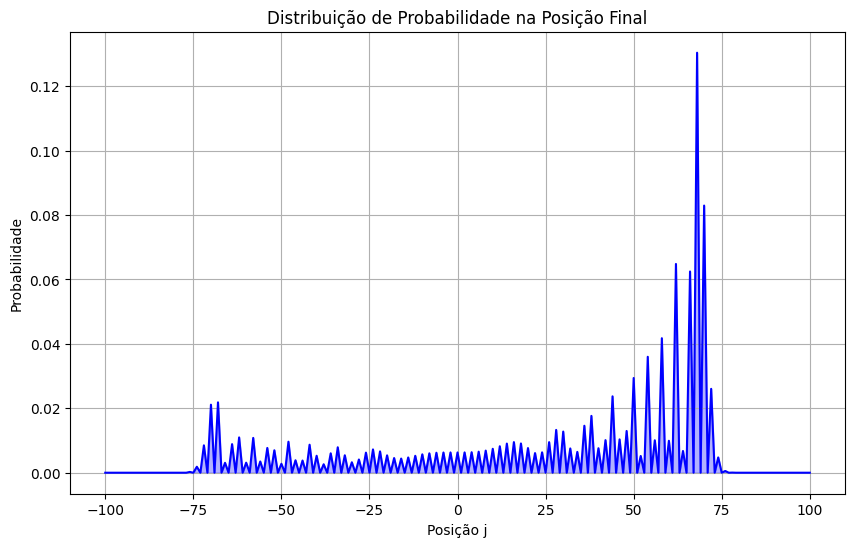

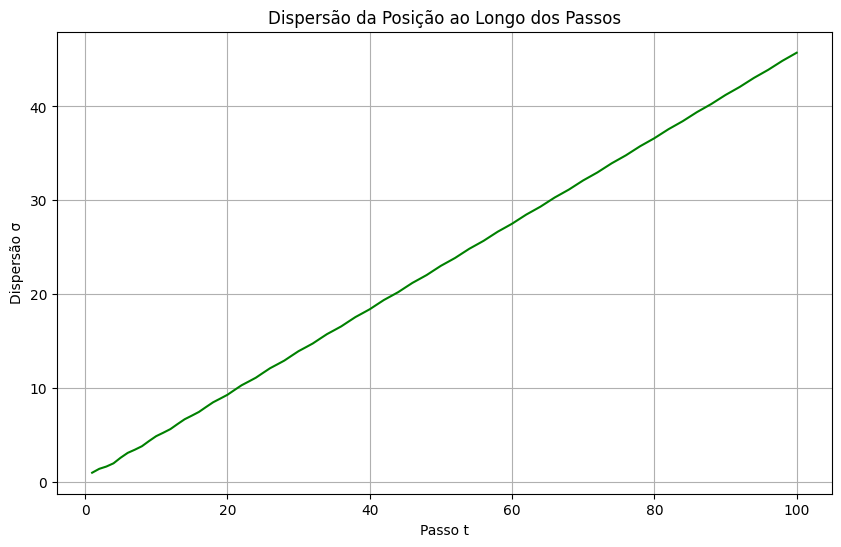

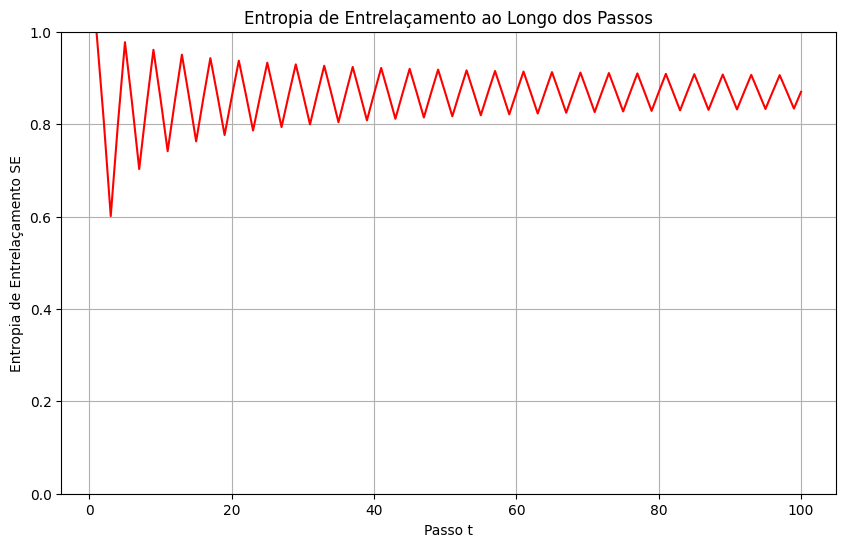

In [6]:
# Código principal que executa a simulação

# Parâmetros da simulação
steps = 100  # Número de passos da simulação
alpha = 0    # Parâmetro alpha para as condições iniciais
beta = 0     # Parâmetro beta para as condições iniciais
q = 0.5      # Parâmetro da moeda quântica (probabilidade)
theta = 0    # Parâmetro theta da moeda
phi = 0      # Parâmetro phi da moeda

# Inicializa as amplitudes a e b
a, b = initialize_states(steps, alpha, beta)

# Atualiza as amplitudes e calcula DP, sigma e SE
DP, sigma, SE = update_amplitudes(a, b, q, theta, phi, steps)

# Plota os resultados (distribuição de probabilidade, dispersão e entropia de entrelaçamento)
plot_results(DP, sigma, SE, steps)
